100%|██████████| 80000/80000 [00:20<00:00, 3867.95it/s]


Train data
min ts size: 59
max ts size: 97
mean ts size: 64
First Start date: 2016-01-01	Last Start date: 2021-02-01
First Finish date: 2019-12-01	Last Finish date: 2024-01-01



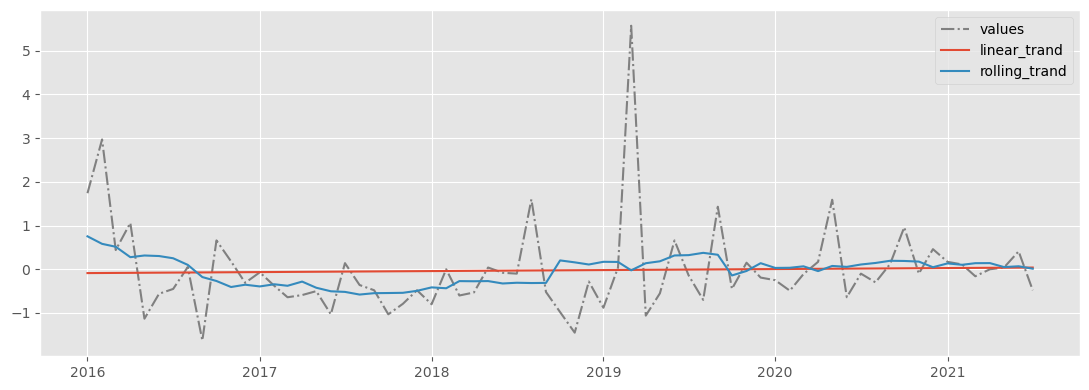

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
from create_dataset import convert_time_series

from warnings import simplefilter
simplefilter('ignore')
plt.style.use("ggplot")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color = '0.75',
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

def plot_ts(id, ts_dict):
    dp = DeterministicProcess(
        index = ts_dict[id]['time_serie'].index,
        constant = True,
        order = 1,
        drop = True)

    X = dp.in_sample()
    y = ts_dict[id]['time_serie']
    model = LinearRegression(fit_intercept= False).fit(X, y)
    ts_trand = pd.Series(
        model.predict(X).reshape(-1),
        index= X.index
        )
    ax = ts_dict[id]['time_serie'].plot(style = '-.', color = '0.5')
    _ = ts_trand.plot(ax= ax, label = 'linear_trand')

    rolling_trand = ts_dict[id]['time_serie'].rolling(
        window = 12,
        center = True,
        min_periods = 6).mean().rename({'values': 'rolling_trand'}, axis = 1)
    _ = rolling_trand.plot(ax = ax)

    plt.legend()
    plt.show()


def get_data_feature(temp_dict):
    min_size = float('inf')
    max_size = float('-inf')
    ts_sizes = []
    start_end_ts = []
    for id, ts in temp_dict.items():
        ts_len = ts['time_serie'].shape[0]
        start_end_ts.append((ts['time_serie'].index[0], ts['time_serie'].index[-1], id))
        ts_sizes.append(ts_len)
        max_size = max(max_size, ts_len)
        min_size = min(max_size, ts_len)
    start_end_ts.sort(key = lambda x: x[0])
    print(f'min ts size: {min_size}\nmax ts size: {max_size}\nmean ts size: {int(np.mean(ts_sizes))}')
    
    print(f'First Start date: {sorted(start_end_ts, key=lambda x: x[0])[0][0]}\t'
          f'Last Start date: {sorted(start_end_ts, key=lambda x: x[0])[-1][0]}\n'
          f'First Finish date: {sorted(start_end_ts, key=lambda x: x[1])[0][1]}\t'
          f'Last Finish date: {sorted(start_end_ts, key=lambda x: x[1])[-1][1]}\n')
    

file_path = 'C:/Users/budar/Jupiter notebooks/VK_test_task/train.parquet'
id_ts_train, _ = convert_time_series(file_path)

print('Train data')
get_data_feature(temp_dict = id_ts_train)

plot_ts(0, id_ts_train)